In [1]:
from scipy import ndimage
import scipy
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib

## Loading an Image

We will use the matplotlib.image library for loading the image from our computer.



In [2]:
!wget https://github.com/CS4MS/CS4MS_W21/raw/main/images/Cancer.jpg

--2021-11-30 13:44:28--  https://github.com/CS4MS/CS4MS_W21/raw/main/images/Cancer.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CS4MS/CS4MS_W21/main/images/Cancer.jpg [following]
--2021-11-30 13:44:28--  https://raw.githubusercontent.com/CS4MS/CS4MS_W21/main/images/Cancer.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124960 (122K) [image/jpeg]
Saving to: ‘Cancer.jpg’

Cancer.jpg          100%[===================>] 122.03K  --.-KB/s    in 0.02s   

2021-11-30 13:44:29 (5.88 MB/s) - ‘Cancer.jpg’ saved [124960/124960]



Cancer.jpg  sample_data


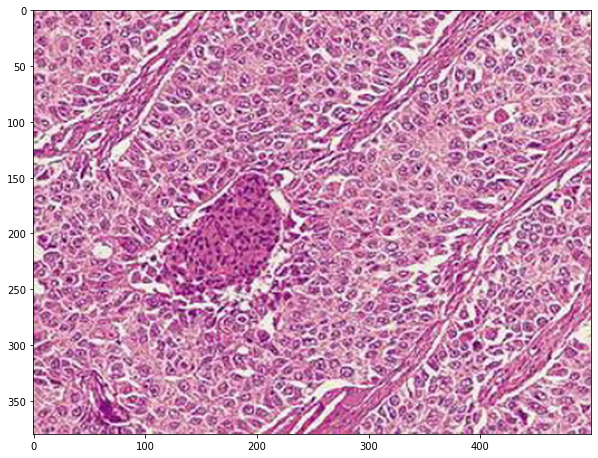

In [3]:
# Load an image
!ls
image = mpimg.imread("Cancer.jpg")

# Display the loaded image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

## Display the Red, Blue and Green channel separately

As you saw in the lecture, a coloured image is made of red, green and blue channels. Let us view each channel separately for the loaded image.

# Homework 1
copy and paste this cell to moodle

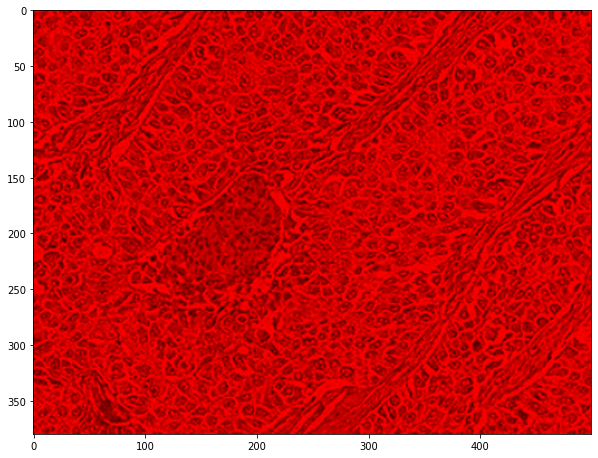

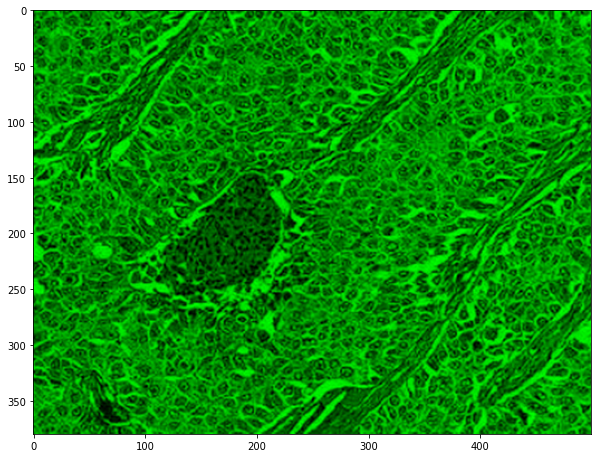

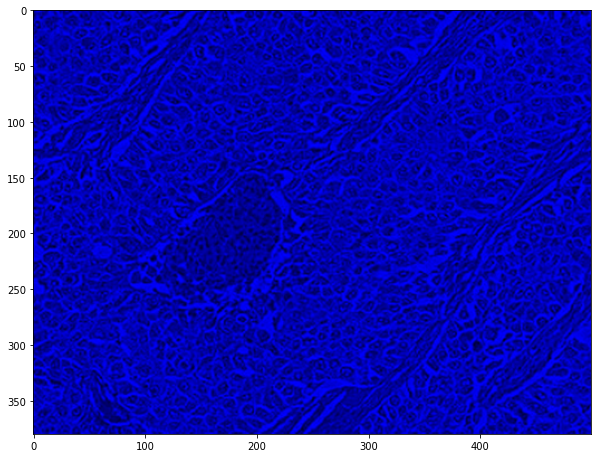

In [5]:
######## Homework 1 ############

b = image.copy()
# set green and red channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0

# do for green
g = image.copy()
# task: set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

# do for red
r = image.copy()
# task: set blue and green channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0

# Red channel
plt.figure(figsize=(10,10))
plt.imshow(r)
plt.show()
# task: visualize only the red channel

# Green channel
plt.figure(figsize=(10,10))
plt.imshow(g)
plt.show()
# task: visualize only the green channel

# Blue channel
plt.figure(figsize=(10,10))
plt.imshow(b)
plt.show()

Let us also see how the image would look in grayscale.

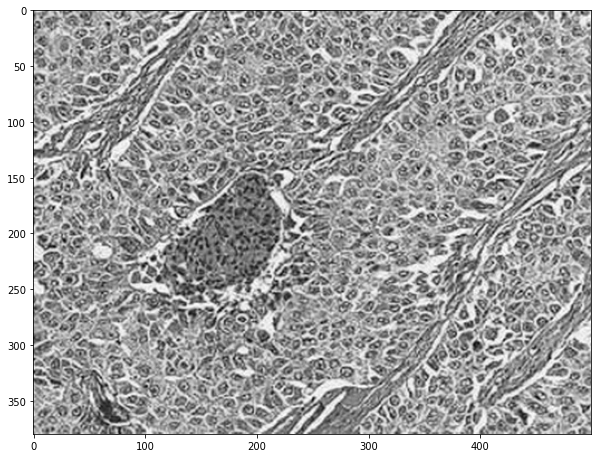

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_cancer = rgb2gray(image)
plt.figure(figsize=(10,10))
plt.imshow(gray_cancer, cmap='gray')
plt.show()

## Sobel Filter

The Sobel filter is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges.

In [7]:
# apply convolution operation
def convolve_Img(img, fi):
    return ndimage.correlate(img, fi, mode='constant', cval=1.0)

# Horizontal edge detection
def grad_x(img):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    
    return convolve_Img(img, Kx)

# Vertical edge detection
def grad_y(img):
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    
    return convolve_Img(img, Ky)


def sobel_filter(img):
    img = rgb2gray(img)
    img = np.array(img)
    
    # horizontal
    x_img = grad_x(img)
    
    # vertical
    y_img = grad_y(img)
    
    # combine
    sob = np.hypot(x_img, y_img)
    
    return sob



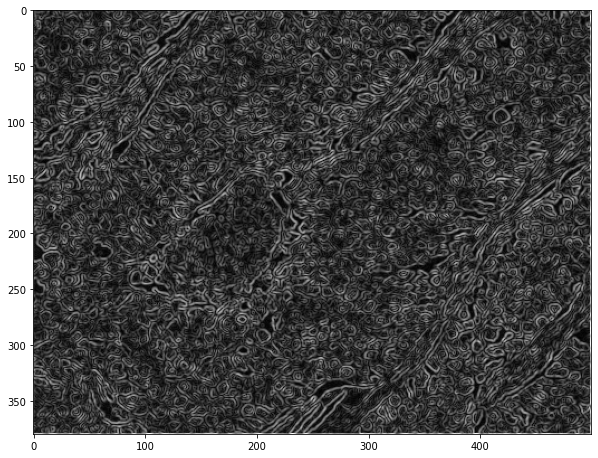

In [8]:
sobel_image = sobel_filter(image)
plt.figure(figsize=(10,10))
plt.imshow(sobel_image, cmap='gray')
plt.show()

## Blurring and De-blurring

We can also use filters to blur and deblur an image.

## Homwork 2
Copy and paste this cell to moodle

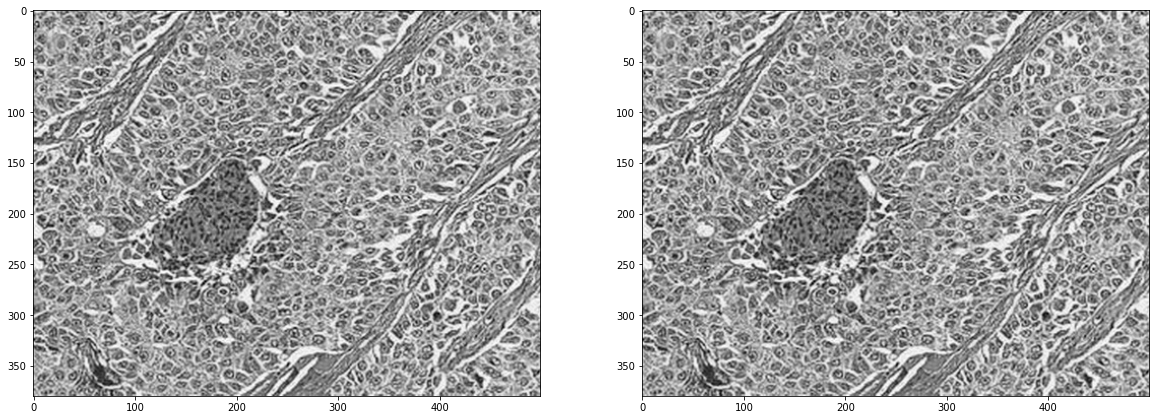

In [9]:
# Blurring Image

# complete the blur filter here
blur_filter = [[1/9, 1/9, 1/9],
               [1/9, 1/9, 1/9],
               [1/9, 1/9, 1/9],]

def blurring(image, degree=3):
    '''
    image: input image
    degree: how much blurring you want / Hint: repeat operation degree times
    '''
    # some preprocessing
    image = rgb2gray(image)
    image = np.array(image)
    
    blurred_image = image
    
    for i in range(degree):
      convolve_Img(image, blur_filter)

    return blurred_image

blurredImg = blurring(image, degree=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

# display original image in grayscale
gray_cancer = rgb2gray(image)
ax1.imshow(gray_cancer, cmap='gray')

# display blurred image
ax2.imshow(blurredImg, cmap='gray')
plt.show()


## Homwork 3
Copy and paste this cell to moodle

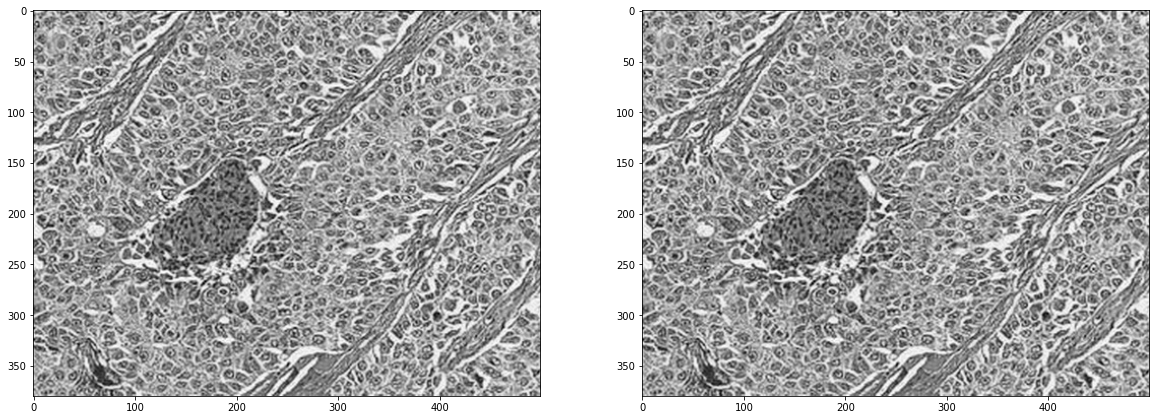

In [11]:
# De-blurring Image
imgBlurred = blurredImg

# write deblur or sharpness filter
deblur_filter = [[-1, -1, -1],
               [-1, 9, -1],
               [-1, -1, -1],]

def deblurring(image, degree=3):
    '''
    image: input blurred image
    degree: how much deblurring you want / Hint: repeat operation degree times
    '''
    
    deblurred_image = image
    
    for i in range(degree):
      convolve_Img(image, deblur_filter)

    return deblurred_image

deblurredImg = deblurring(imgBlurred, degree=2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

# display the blurred image
ax1.imshow(imgBlurred, cmap='gray')

# display deblurred image
ax2.imshow(deblurredImg, cmap='gray')
plt.show()